# Generating data with a known covariance

In [2]:
import numpy as np
import pandas as pd

In [21]:
history = pd.read_csv("user_history.csv").drop(['USER ID'],axis=1)
ratings = pd.read_csv  ("user_ratings.csv")
#print(X)
rowh, colh = history.shape

In [5]:
history  = history  - np.mean(history , 0)
C = (history .T @ history) / rowh

In [7]:
import matplotlib.pyplot as plt

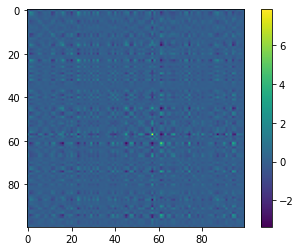

In [9]:
plt.imshow(C)
plt.colorbar()
plt.show()

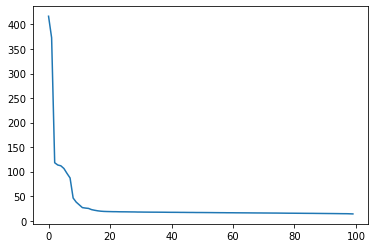

In [11]:
U, S, V = np.linalg.svd(history )
plt.plot(S)
plt.show()

In [13]:
#n = 100
#d = 10
Sigma = np.diag(np.linspace(colh, 2, colh))
history  = np.random.normal(size = (rowh, colh)) @ (Sigma ** 0.5)
history  = history  - np.mean(history , 0)

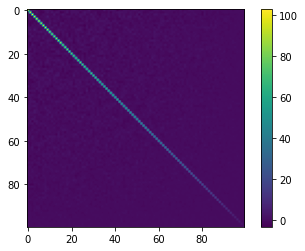

In [14]:
C = (history.T @ history ) / rowh
plt.imshow(C)
plt.colorbar()
plt.show()

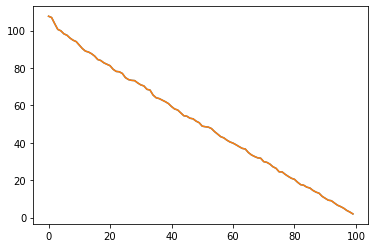

In [15]:
U, S, V = np.linalg.svd(history )
D, _ = np.linalg.eig(C)
plt.plot(S ** 2 / rowh)
plt.plot(np.sort(D)[::-1])
plt.show()

In [23]:
#using PCA on the "user_history.csv" file to look at the data in 2-dimensions
#looked at: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
features = history.columns
# Separating out the features
x = history.loc[:, features].values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)

y = ratings.loc[:,['RATING']].values

#print(principalComponents)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf)

finalDf = pd.concat([principalDf, ratings[['RATING']]], axis = 1)
#print(finalDf)
#print(pca.score(x))

      principal component 1  principal component 2
0                 -1.774171               7.000454
1                 -5.217170              -5.077730
2                  9.119442              -1.495651
3                 -0.684816               4.096796
4                  8.223115              -1.777060
...                     ...                    ...
4495               8.935706              -1.172728
4496              -5.689864              -5.896925
4497              -2.708871               7.493033
4498               7.490331              -1.267794
4499               6.769193              -0.592792

[4500 rows x 2 columns]


In [54]:
finalDf = finalDf.fillna(0)
print(finalDf)
#compression_opts = dict(method='zip', archive_name='out.csv')  
#finalDf.to_csv('out.csv', index=False,compression=compression_opts)  

       principal component 1  principal component 2  RATING
0                  -1.774171               7.000454       4
1                  -5.217170              -5.077730       4
2                   9.119442              -1.495651       3
3                  -0.684816               4.096796       2
4                   8.223115              -1.777060       3
...                      ...                    ...     ...
33720               0.000000               0.000000       4
33721               0.000000               0.000000       8
33722               0.000000               0.000000       7
33723               0.000000               0.000000       7
33724               0.000000               0.000000       7

[33725 rows x 3 columns]


In [47]:
#use to predict ratings 
rate = np.asarray(ratings["RATING"])
#print(ratings)
print(rate)
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
#m, c = np.linalg.lstsq(history, rate, rcond=None)[0]
pinv = np.linalg.pinv(features)
alpha = pinv.dot(rate)
print(alpha)

#print(m)
#print(c)

[4 4 3 ... 7 7 7]


TypeError: loop of ufunc does not support argument 0 of type str which has no callable conjugate method